# Pracitcal A - Data Exploration in Pandas


In this practical we'll be using Python/[Pandas](https://pandas.pydata.org) to explore and visualise some example data using [Jupyter Notebooks](jupyter.org) in [Google Collab](colab.research.google.com).

The data files that we will be using in this prac, and many future pracs, are hosted on GitHub at [github.com/PaulHancock/COMP5009_pracs](https://github.com/PaulHancock/COMP5009_pracs)

For each of these notebooks you should either:
- File -> Save as copy in Drive
  - To run via google collab
- File -> Downaload -> Download .ipynb
  - If you want to run on your own computer.
  - Good idea to do this at the end of the prac so you have a record of your work.



## Titanic Manifest

Complete the following tasks:
1. Load the data file [titanic.csv](https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/titanic.csv) from GitHub. 
1. Is the data multidimensional?  
  a. Find the number of attributes and the number of instances. 
1. Examine each attribute (pay attention to the number of distinct/unique values) and suggest the best data type for it. 
1. For each attribute, check if there are any missing entries and list these instances if found. 
1. For each attribute, plot its histogram and make a comment. 
  a. Find the min, max, median, mode values if relevant 

In [1]:
# Load the modules that we'll be using
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# np, pd, and plt are common shorthands for these often used modules

### Part 1.
Lets load the data into a pandas data frame

In [3]:
# The data are hosted in github and we can load it directly from the URL
data_url = 'https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/titanic.csv'
df = pd.read_csv(data_url)

In [4]:
# Inspect the data frame to see what that data looks like. The first few rows will be enough.
df.head()
# we could pass a parameter to head to give us more or fewer rows. Default is 5.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Note that above there is a column on the left with no title. This is the pandas index for that instance/row, it is *not* part of the data that were loaded.

### Part 2.
Is the data multi-dimensional?
There are two options here:
- Inspect the table above manually (by eye)
- Inspect the data frame programatically

We'll do both and see if they agree.

In [5]:
# access columns. Note that the index mentioned above is not included in this.
print(df.columns)

# the number of dimensions is the number of columns
dimensions = len(df.axes[0])
instances = len(df.axes[1])
print(f'The data has {dimensions} dimensions and {instances} instances')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
The data has 891 dimensions and 12 instances


Does your programatic approach agree with your by-eye inspection?

### Part 3.
Examine each attribute (pay attention to the number of distinct/unique values) and suggest the best data type for it.

By eye, what data types do you suggest for each column?

Compare this to what pandas has assumed by inspecting the parameter `df.dtypes`

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Part 4.
For each attribute, check if there are any missing entries and list these instances if found.

Here we can make use of the function `isna` attached to each of the columns. The `isna` function will return a list of `True/False` for each entry in the column, cooresponding to entires that are `NaN` or not. Look at the first row of the table show above - you can see that the attribute `Cabin` is `NaN`. Pandas uses `NaN` to represent masked or missing data. In the csv file this is an entry corresponding to the empty string.

Once you figure out how to count the number of missing entries in a column I recommend that you create a function that will iterate over all columns and print out the number and fraction of missing items.

In [8]:
# find which columns have missing data
def n_missing(df):
    for attributes in df.columns:
        missing = df[attributes].isna().sum()
        total = len(df[attributes])
        print(f'{attributes} has {missing}/{total} blank entries ({missing/total*100:.2f}%)')
    return

Once you have written the function `n_missing` run it in the cell below passing in our data frame.

In [9]:
n_missing(df)

PassengerId has 0/891 blank entries (0.00%)
Survived has 0/891 blank entries (0.00%)
Pclass has 0/891 blank entries (0.00%)
Name has 0/891 blank entries (0.00%)
Sex has 0/891 blank entries (0.00%)
Age has 177/891 blank entries (19.87%)
SibSp has 0/891 blank entries (0.00%)
Parch has 0/891 blank entries (0.00%)
Ticket has 0/891 blank entries (0.00%)
Fare has 0/891 blank entries (0.00%)
Cabin has 687/891 blank entries (77.10%)
Embarked has 2/891 blank entries (0.22%)


### Part 5
For each attribute, plot its histogram and make a comment. Find the min, max, median, mode values if relevant.

This is most easily done using the `.plot()` function provided by each column of our dataframe.
Use `help(df.plot)` to see the parameters that we can provide.

Below is an example for the first attribute:

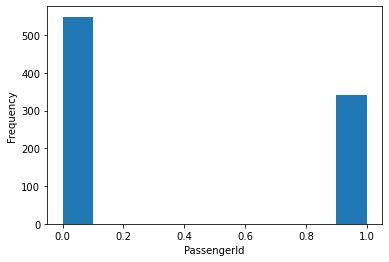

In [11]:
# the plot function returns a matplotlib axes instances so we capture that and modify the plot afterwards
ax = df['Survived'].plot(kind='hist')
ax.set_xlabel('PassengerId')
plt.show() # calling this will supress extra text output. It's not essential.

You might want to make a function that will iterate through each of the attributes and plot them. Extra points if you can do this as a grid of plots.

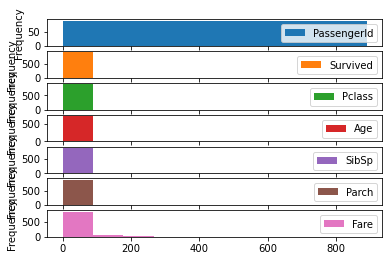

In [15]:
# plot histograms for all the numeric attributes
df.plot(subplots=True, kind = 'hist')

plt.show()

Computing the min/max/median/mode of each of the attributes can be done using either columns functions. However since this is a fairly common task, pandas provides us a high level summary of our data frame via `df.describe()`. Try it below.

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Why do we not have more columns here? For example, why is there no summary for the `Name` attribute?

In [ ]:
'''there is no summary for these columns as they are of object type'''